# Network Analysis and Web Knownledge Mining

##                                                  HW1

*Tassos Karageorgiadis aid21002*

# Import packages needed


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
# change defaults to be less ugly
mpl.rc('xtick', labelsize=14, color="#222222") 
mpl.rc('ytick', labelsize=14, color="#222222") 
mpl.rc('font', **{'family':'sans-serif','sans-serif':['Arial']})
mpl.rc('font', size=16)
mpl.rc('xtick.major', size=6, width=1)
mpl.rc('xtick.minor', size=3, width=1)
mpl.rc('ytick.major', size=6, width=1)
mpl.rc('ytick.minor', size=3, width=1)
mpl.rc('axes', linewidth=1, edgecolor="#222222", labelcolor="#222222")
mpl.rc('text', usetex=False, color="#222222")

## Read Data from files


#### Reading data and forming a directed graph

In [3]:
G1 = nx.read_edgelist('./p2p-Gnutella09.txt', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter='\t', 
                     nodetype=int, 
                     encoding='utf-8')

 *Creating two different graphs for each dataset*

In [4]:
G2 = nx.read_edgelist('./ca-HepTh.txt', comments='#',
                     create_using=nx.DiGraph(), 
                     delimiter='\t', 
                     nodetype=int, 
                     encoding='utf-8')

## Problem1 - Part 1

#### Question 1a

In [5]:
N1 = len(G1) #number of nodes for Graph1 #G1.number_of_nodes()
N2 = len(G2) #G2.number_of_nodes()

print("Numer of nodes of Graph1-Gnutella_p2p",N1)
print("Numer of nodes of Graph2-HighEnergyPhysics",N2)

Numer of nodes of Graph1-Gnutella_p2p 8114
Numer of nodes of Graph2-HighEnergyPhysics 9877


Each files contains numbers representing int type nodes, nodes are separated with tab space. Values of nodes are checked with the ones refferenced inside data comments.

#### Question 1b

In [6]:
edges1 = G1.size() #G1.number_of_edges()
edges2 = G2.size() #G2.number_of_edges()

print("the graph1 has a total length aka number of edges",edges1)
print("the graph2 has a total length aka number of edges",edges2)

the graph1 has a total length aka number of edges 26013
the graph2 has a total length aka number of edges 51971


In [7]:
graph1_reciprocity = nx.reciprocity(G1) # reciprocity ratio
numOfrecipEdges1 = graph1_reciprocity * edges1

graph2_reciprocity = nx.reciprocity(G2) # reciprocity ratio 2
numOfrecipEdges2 = graph2_reciprocity * edges2

print("| ReciprocityRatio  |  Number of Reciprocated Eges |\n")
print("| --------------------------------------------------- |\n")
print("| *******************Graph1***************            |\n")
print("| --------------------------------------------------- |\n")
print('| \t',graph1_reciprocity,'\t\t\t',numOfrecipEdges1,'\t\t      |')
print("| --------------------------------------------------- |\n")
print("| *******************Graph2***************            |\n")
print("-------------------------------------------------------\n")
print('| \t',round(graph2_reciprocity,4),'\t\t\t',numOfrecipEdges2,'\t\t      |')
print("| --------------------------------------------------- |\n")

| ReciprocityRatio  |  Number of Reciprocated Eges |

| --------------------------------------------------- |

| *******************Graph1***************            |

| --------------------------------------------------- |

| 	 0.0 			 0.0 		      |
| --------------------------------------------------- |

| *******************Graph2***************            |

-------------------------------------------------------

| 	 0.9995 			 51946.0 		      |
| --------------------------------------------------- |



In the above code section after calculating the reciprocity ratio, I multiply with the total number of edges of each node in order to get the reciprocated edges number, as you can see the Graph1 with Gnutella data doesn't has any while **Graph2** has **51946** *reciprocated edges*!

#### Question 1d

In [14]:
C1 = max(nx.strongly_connected_components(G1), key=len)
C2 = max(nx.strongly_connected_components(G2), key=len)
# print(C1)
S1 = G1.subgraph(C1)
S2 = G2.subgraph(C2)

# nx.draw(S)
print("Diameter for Graph1-strongly_connected ones =",nx.diameter(S1))
print("Diameter for Graph2-strongly_connected ones =",nx.diameter(S2))

Diameter for Graph1-strongly_connected ones = 19
Diameter for Graph2-strongly_connected ones = 18


#### Question 1e

In [15]:
print("Average degree of Graph1-gnutella = ",2*edges1/N1)
print("Average degree of Graph2-hep = ",2*edges2/N2)

Average degree of Graph1-gnutella =  6.411880700024649
Average degree of Graph2-hep =  10.52364078161385


#### Question 1f

In [21]:
print('\n ----------- average clustering coefficient --------------- \n')
print('The Average cluster-coef of graph 1 = ', nx.average_clustering(G1))
print('The Average cluster-coef of graph 2 = ', nx.average_clustering(G2))

print('\n ----------- global clustering --------------- \n')

print('The global cluster-coef of graph 1 = ', nx.transitivity(G1))
print('The global cluster-coef of graph 2 = ', nx.transitivity(G2))


 ----------- average clustering coefficient --------------- 

The Average cluster-coef of graph 1 =  0.004763212582794919
The Average cluster-coef of graph 2 =  0.4714390529669332

 ----------- global clustering --------------- 

The global cluster-coef of graph 1 =  0.009501041040876285
The global cluster-coef of graph 2 =  0.2839996525875546


#### Question 1g

In [28]:
# strong connected
S1und = S1.to_undirected()
S2und = S2.to_undirected()
NS1 = len(S1und)
NS2 = len(S2und)
edgesS1 = S1und.size()
edgesS2 = S2und.size()

print("Strong connected sub-graph1 (nodes,edges)",(NS1,edgesS1))
print("Strong connected sub-graph2 (nodes,edges)",(NS2,edgesS2))


Strong connected sub-graph1 (nodes,edges) (2624, 10776)
Strong connected sub-graph2 (nodes,edges) (8638, 24827)


#### Question 1h

In [31]:
# weakly connected
C1w = max(nx.weakly_connected_components(G1), key=len)
C2w = max(nx.weakly_connected_components(G2), key=len)

S1w = G1.subgraph(C1w)
S2w = G2.subgraph(C2w)


S1Wund = S1w.to_undirected()
S2Wund = S2w.to_undirected()
NS1w = len(S1Wund)
NS2w = len(S2Wund)
edgesS1w = S1Wund.size()
edgesS2w = S2Wund.size()

print("Weakly connected sub-graph1 (nodes,edges)",(NS1w,edgesS1w))
print("Weakly connected sub-graph2 (nodes,edges)",(NS2w,edgesS2w))

Strong connected sub-graph1 (nodes,edges) (8104, 26008)
Strong connected sub-graph2 (nodes,edges) (8638, 24827)


## Problem 1 - Part 2

#### Question 1.2a

##### Graph1 Plot linear degrees distribution

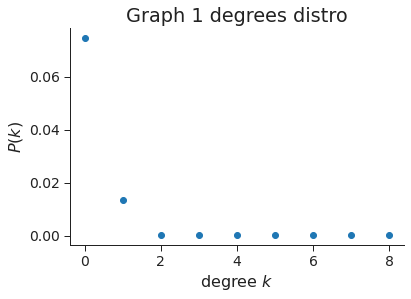

In [51]:
degrees1 = [G1.degree(node) for node in G1]
kmin1 = min(degrees1)
kmax1 = max(degrees1)

# Get 20 linear spaced bins between kmin and kmax
bin_edges1 = np.linspace(kmin1, kmax1, num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees1, bins=bin_edges1, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
# log_be = np.log10(bin_edges1)
# x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title("Graph 1 degrees distro")
plt.plot(density,marker='o', linestyle='none')
# plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

##### Graph 2 degrees linear distro

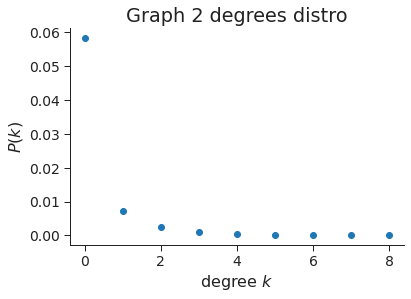

In [52]:
degrees2 = [G2.degree(node) for node in G2]
kmin2 = min(degrees2)
kmax2 = max(degrees2)

# Get 20 linear spaced bins between kmin and kmax
bin_edges2= np.linspace(kmin2,kmax2,num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees2,bins=bin_edges2,density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
# log_be = np.log10(bin_edges2)
# x = 10**((log_be[1:] + log_be[:-1])/2)
plt.title("Graph 2 degrees distro")
plt.plot(density,marker='o', linestyle='none')
# plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

#### Question 1.2b

##### Graph1 degrees log plot

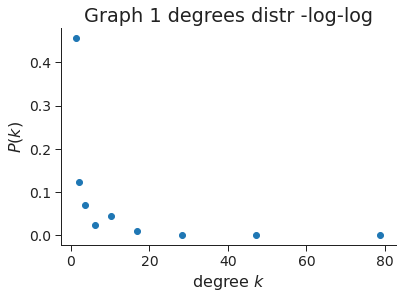

In [48]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges1b = np.logspace(np.log10(kmin1), np.log10(kmax1), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees1, bins=bin_edges1b, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges1b)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title("Graph 1 degrees distr -log-log")
plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

##### Graph 2 log-log plot

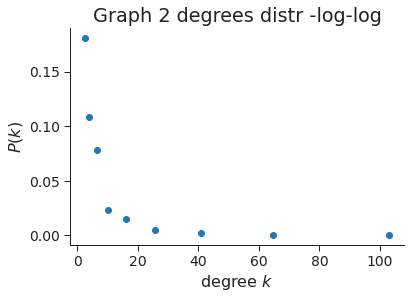

In [47]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges2b = np.logspace(np.log10(kmin2), np.log10(kmax2), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees2, bins=bin_edges2b, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edges2b)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title("Graph 2 degrees distr -log-log")
plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

#### Question 1.2c

<ipython-input-59-7e8e90d35c0c>:12: RuntimeWarning: overflow encountered in power
  x = 2.7**((exp_be[1:] + exp_be[:-1])/2)


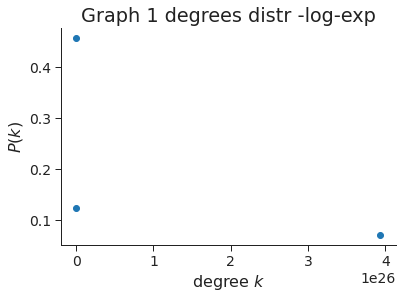

In [59]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges1b = np.logspace(np.log10(kmin1), np.log10(kmax1), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees1, bins=bin_edges1b, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN exp SPACE) of each bin
exp_be = np.exp(bin_edges1b)
x = 2.7**((exp_be[1:] + exp_be[:-1])/2)

plt.title("Graph 1 degrees distr -log-exp")
plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

<ipython-input-60-7107c9dc5cd3>:12: RuntimeWarning: overflow encountered in power
  x = 2.7**((exp_be[1:] + exp_be[:-1])/2)


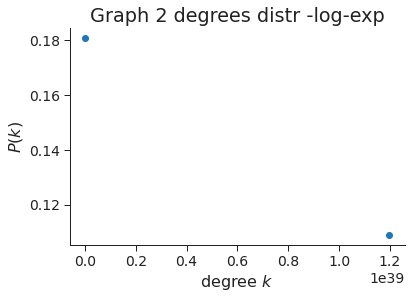

In [60]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edges2b = np.logspace(np.log10(kmin2), np.log10(kmax2), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees2, bins=bin_edges2b, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN exp SPACE) of each bin
exp_be = np.exp(bin_edges2b)
x = 2.7**((exp_be[1:] + exp_be[:-1])/2)

plt.title("Graph 2 degrees distr -log-exp")
plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

#### Question 2d

##### CDF

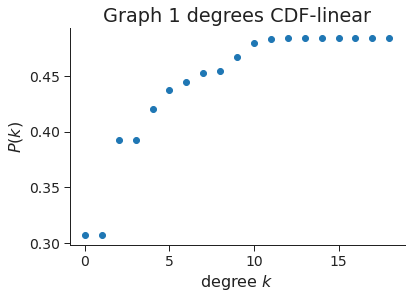

In [70]:
bin_edges1b = np.logspace(np.log10(kmin1), np.log10(kmax1), num=20)

# histogram the data into these bins
density, _ = np.histogram(degrees1, bins=bin_edges1b, density=True)




fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
# log_be = np.log10(bin_edges1b)
# x = 10**((log_be[1:] + log_be[:-1])/2)
dx = bin_edges1b[1] -bin_edges1b[0]

F1 = np.cumsum(density)*dx

plt.title("Graph 1 degrees CDF-linear")
plt.plot(F1, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

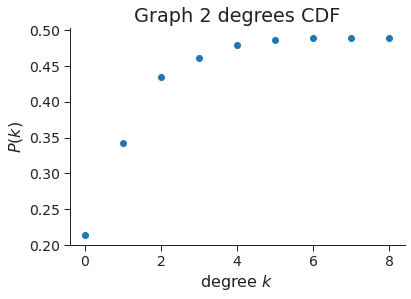

In [69]:
bin_edges2b = np.logspace(np.log10(kmin2), np.log10(kmax2), num=10)

# histogram the data into these bins
density, _ = np.histogram(degrees2, bins=bin_edges2b, density=True)




fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
# log_be = np.log10(bin_edges1b)
# x = 10**((log_be[1:] + log_be[:-1])/2)
dx = bin_edges2b[1] -bin_edges2b[0]

F2 = np.cumsum(density)*dx

plt.title("Graph 2 degrees CDF")
plt.plot( F2, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

#### Question 1.2e

##### Zipf log distro

In [94]:
degrees1sort = np.sort(degrees1)
degrees2sort = np.sort(degrees2)

# ranking
order1 = degrees1sort.argsort()
ranks1 = order1.argsort()
# print(ranks1)
order2 = degrees2sort.argsort()
ranks2 = order2.argsort()



[   0 1656 1657 ... 8111 8112 8113]
[   1 1656 1657 ... 8111 8112 8113]


In [ ]:
# get logarithmic scale graph 1
log_deg1  = np.log10(degrees1sort)
ranks1_new = np.where(ranks1 > 0, ranks1, 1)
# print(ranks1_new)
log_rank1 = np.log10(ranks1_new) # through zero out

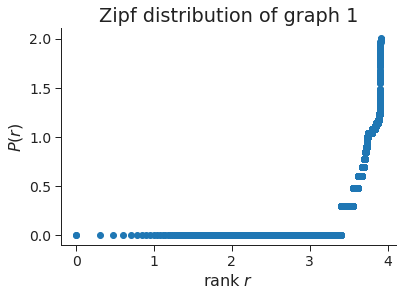

In [98]:
fig = plt.figure(figsize=(6,4))
plt.title("Zipf distribution of graph 1")
plt.plot(log_rank1,log_deg1, marker='o', linestyle='none')
plt.xlabel(r"rank $r$", fontsize=16)
plt.ylabel(r"$P(r)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

In [99]:
# get logarithmic scale graph 1
log_deg2  = np.log10(degrees2sort)
ranks2_new = np.where(ranks2 > 0, ranks2, 1)
# print(ranks2_new)
log_rank2 = np.log10(ranks2_new) # through zero out

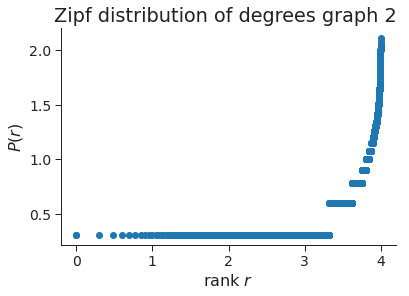

In [100]:
fig = plt.figure(figsize=(6,4))
plt.title("Zipf distribution of degrees graph 2 ")
plt.plot(log_rank2,log_deg2, marker='o', linestyle='none')
plt.xlabel(r"rank $r$", fontsize=16)
plt.ylabel(r"$P(r)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

## Problem 2 

#### Question 2a

In [103]:
N = 8500
print("Energy Physics -Theory number of edges =",edges2)

G_er = nx.erdos_renyi_graph(N,0.5)
# nx.draw(G_er, with_labels=True)
# plt.show()


Energy Physics -Theory number of edges = 51971


**Metrics for Erdos-Renyi**

In [108]:
nodess = len(G_er)
edgess = G_er.size()
print("Number of nodes of erdos-renyi ",nodess)
print("Number of egdes of erdos-renyi ",edgess)

print("Average degree of erdos-renyi = ",2*edgess/nodess)


Number of nodes of erdos-renyi  8500
Number of egdes of erdos-renyi  18058529
Average degree of erdos-renyi =  4249.065647058824


In [128]:
print('\n ----------- average clustering coefficient --------------- \n')
print('The Average cluster-coef of erdos-renyi = ', nx.average_clustering(G_er))


print('\n ----------- global clustering --------------- \n')

print('The global cluster-coef of graph erdos-renyi = ', nx.transitivity(G_er))



 ----------- average clustering coefficient --------------- 



KeyboardInterrupt: 

#### Question 2b

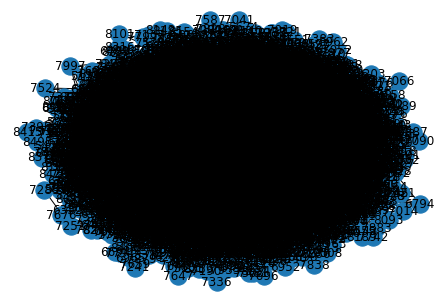

In [112]:
G_ba = nx.barabasi_albert_graph(N,round(edges2/N))

nx.draw(G_ba, with_labels=True)
plt.show()

In the above model generation I added as parameters the **N = 8500** and the low integer of **#edgesOfGraph2/N** so each node has ~6 edges in order to sum up to number of edges of graph Energy Physics theory -aka GRaph2

**Metrics for Barabasi Albert Graph**

In [114]:
nodess = len(G_ba)
edgess = G_ba.size()
print("Number of nodes of erdos-renyi ",nodess)
print("Number of egdes of erdos-renyi ",edgess)

print("Average degree of erdos-renyi = ",2*edgess/nodess)

Number of nodes of erdos-renyi  8500
Number of egdes of erdos-renyi  50964
Average degree of erdos-renyi =  11.991529411764706


In [115]:
print('\n ----------- average clustering coefficient --------------- \n')
print('The Average cluster-coef of erdos-renyi = ', nx.average_clustering(G_ba))


print('\n ----------- global clustering --------------- \n')

print('The global cluster-coef of graph erdos-renyi = ', nx.transitivity(G_ba))


 ----------- average clustering coefficient --------------- 

The Average cluster-coef of erdos-renyi =  0.008834143339624756

 ----------- global clustering --------------- 

The global cluster-coef of graph erdos-renyi =  0.00670808643848525


#### Question 2c

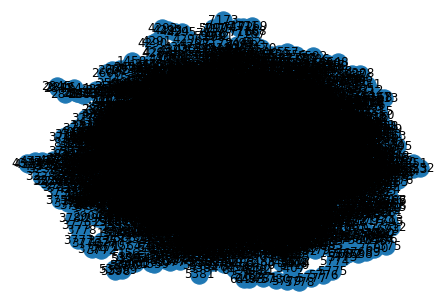

In [117]:
G_ws = nx.watts_strogatz_graph(N,round(edges2/N),0.1)

nx.draw(G_ws, with_labels=True)
plt.show()

In the above model generation I added as parameters the **N = 8500** and the low integer of **#edgesOfGraph2/N** so each node has ~6 edges or 6 nearest neighrboors in order to sum up to number of edges of graph Energy Physics theory -aka GRaph2. Also add a low probability of replacing an edge with a new.

**Metrics for Watts Strogatz Graph**

In [119]:
nodess = len(G_ws)
edgess = G_ws.size()
print("Number of nodes of erdos-renyi ",nodess)
print("Number of egdes of erdos-renyi ",edgess)

print("Average degree of erdos-renyi = ",2*edgess/nodess)

Number of nodes of erdos-renyi  8500
Number of egdes of erdos-renyi  25500
Average degree of erdos-renyi =  6.0


In [120]:
print('\n ----------- average clustering coefficient --------------- \n')
print('The Average cluster-coef of erdos-renyi = ', nx.average_clustering(G_ba))


print('\n ----------- global clustering --------------- \n')

print('The global cluster-coef of graph erdos-renyi = ', nx.transitivity(G_ba))


 ----------- average clustering coefficient --------------- 

The Average cluster-coef of erdos-renyi =  0.008834143339624756

 ----------- global clustering --------------- 

The global cluster-coef of graph erdos-renyi =  0.00670808643848525


## Zipf Distribution for all the above graphs

In [123]:
degreesER = [G_er.degree(node) for node in G_er]
degreesBA = [G_ba.degree(node) for node in G_ba]
degreesWS = [G_ws.degree(node) for node in G_ws]

degreesERsort = np.sort(degreesER)
degreesBAsort = np.sort(degreesBA)
degreesWSsort = np.sort(degreesWS)

# ranking
orderER = degreesERsort.argsort()
ranksER = orderER.argsort()

# print(ranks1)
orderBA = degreesBAsort.argsort()
ranksBA = orderBA.argsort()

orderWS = degreesWSsort.argsort()
ranksWS = orderWS.argsort()

In [124]:
# get logarithmic scale graph ER
log_degER  = np.log10(degreesERsort)
ranksER_new = np.where(ranksER > 0, ranksER, 1)
# print(ranks1_new)
log_rankER = np.log10(ranksER_new) # through zero out

# get logarithmic for graph BA

log_degBA  = np.log10(degreesBAsort)
ranksBA_new = np.where(ranksBA > 0, ranksBA, 1)
# print(ranks1_new)
log_rankBA = np.log10(ranksBA_new) # through zero out

# get logaritmic for graph WS

log_degWS  = np.log10(degreesWSsort)
ranksWS_new = np.where(ranksWS > 0, ranksWS, 1)
# print(ranks1_new)
log_rankWS = np.log10(ranksWS_new) # through zero out

## Plot Zipf of ER

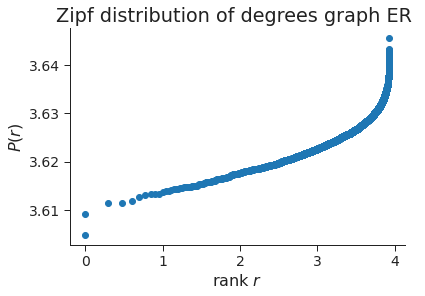

In [125]:
fig = plt.figure(figsize=(6,4))
plt.title("Zipf distribution of degrees graph ER ")
plt.plot(log_rankER,log_degER, marker='o', linestyle='none')
plt.xlabel(r"rank $r$", fontsize=16)
plt.ylabel(r"$P(r)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

## Plot Zipf of BA

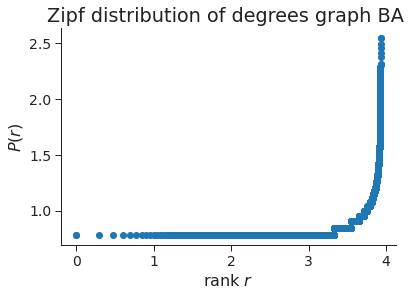

In [126]:
fig = plt.figure(figsize=(6,4))
plt.title("Zipf distribution of degrees graph BA ")
plt.plot(log_rankBA,log_degBA, marker='o', linestyle='none')
plt.xlabel(r"rank $r$", fontsize=16)
plt.ylabel(r"$P(r)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

## Plot Zipf of WS

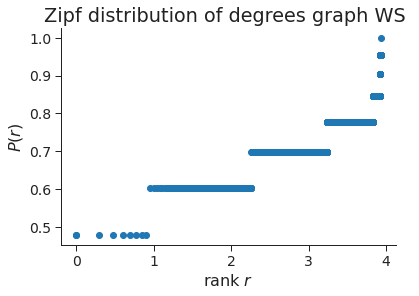

In [140]:
fig = plt.figure(figsize=(6,4))
plt.title("Zipf distribution of degrees graph WS ")
plt.plot(log_rankWS,log_degWS, marker='o', linestyle='none')
plt.xlabel(r"rank $r$", fontsize=16)
plt.ylabel(r"$P(r)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

## CDF of each graph ER,BA,WS 

#### CDF of ER

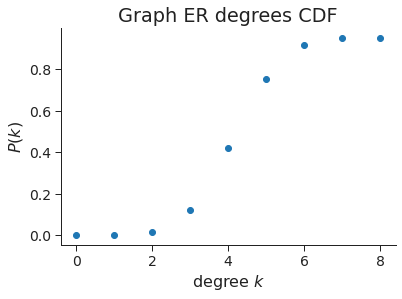

In [130]:
kminER = min(degreesER)
kmaxER = max(degreesER)

bin_edges2b = np.logspace(np.log10(kminER), np.log10(kmaxER), num=10)

# histogram the data into these bins
density, _ = np.histogram(degreesER, bins=bin_edges2b, density=True)




fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
# log_be = np.log10(bin_edges1b)
# x = 10**((log_be[1:] + log_be[:-1])/2)
dx = bin_edges2b[1] -bin_edges2b[0]

F2 = np.cumsum(density)*dx

plt.title("Graph ER degrees CDF")
plt.plot( F2, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

### CDF of BA

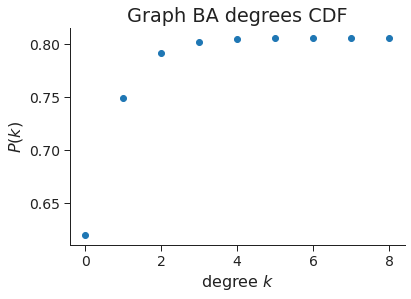

In [133]:
kminBA = min(degreesBA)
kmaxBA = max(degreesBA)

bin_edgesBA = np.logspace(np.log10(kminBA), np.log10(kmaxBA), num=10)

# histogram the data into these bins
density, _ = np.histogram(degreesBA, bins=bin_edgesBA, density=True)




fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
# log_be = np.log10(bin_edges1b)
# x = 10**((log_be[1:] + log_be[:-1])/2)
dx = bin_edges2b[1] -bin_edges2b[0]

F2 = np.cumsum(density)*dx

plt.title("Graph BA degrees CDF")
plt.plot( F2, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

### CDF of WS 

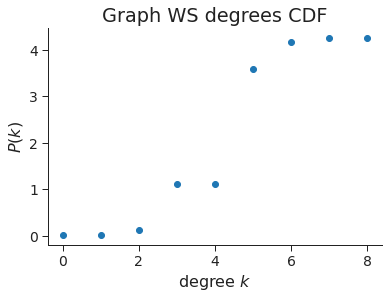

In [134]:
kminWS = min(degreesWS)
kmaxWS = max(degreesWS)

bin_edgesWS = np.logspace(np.log10(kminWS), np.log10(kmaxWS), num=10)

# histogram the data into these bins
density, _ = np.histogram(degreesWS, bins=bin_edgesWS, density=True)




fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
# log_be = np.log10(bin_edges1b)
# x = 10**((log_be[1:] + log_be[:-1])/2)
dx = bin_edges2b[1] -bin_edges2b[0]

F2 = np.cumsum(density)*dx

plt.title("Graph WS degrees CDF")
plt.plot( F2, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

## Linear Distribution of each graph

### Linear distr ER plot

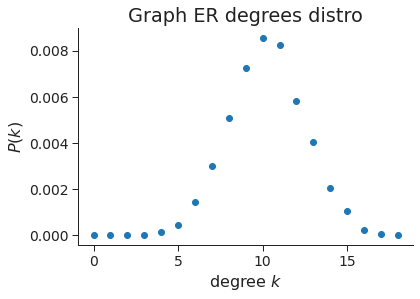

In [135]:
# Get 20 linear spaced bins between kmin and kmax
bin_edgesER = np.linspace(kminER, kmaxER, num=20)

# histogram the data into these bins
density, _ = np.histogram(degreesER, bins=bin_edgesER, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
# log_be = np.log10(bin_edges1)
# x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title("Graph ER degrees distro")
plt.plot(density,marker='o', linestyle='none')
# plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

For ER type of graph we see that linear and log spaces, degrees distribution is following a form of Gaussian bell.

### Log scale ER plot

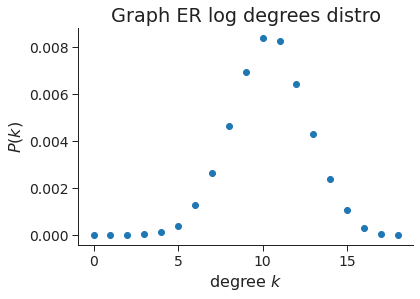

In [143]:
bin_edgesER = np.logspace(np.log10(kminER), np.log10(kmaxER), num=20)

# histogram the data into these bins
density, _ = np.histogram(degreesER, bins=bin_edgesER, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edgesER)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title("Graph ER log degrees distro")
plt.plot(density,marker='o', linestyle='none')
# plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the 

### Log exp binning for ER

<ipython-input-147-ea261c0532d8>:11: RuntimeWarning: overflow encountered in exp
  exp_be = np.exp(bin_edgesER)


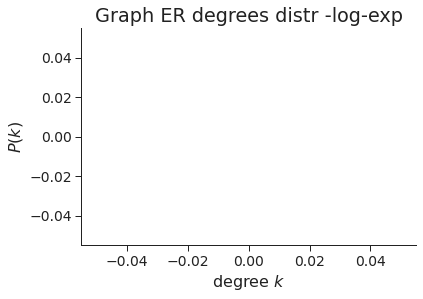

In [147]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edgesER = np.logspace(np.log10(kminER), np.log10(kmaxER), num=10)

# histogram the data into these bins
density, _ = np.histogram(degreesER, bins=bin_edgesER, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN exp SPACE) of each bin
exp_be = np.exp(bin_edgesER)
x = 2.7**((exp_be[1:] + exp_be[:-1])/2)

plt.title("Graph ER degrees distr -log-exp")
plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

### Linear Distr BA plot

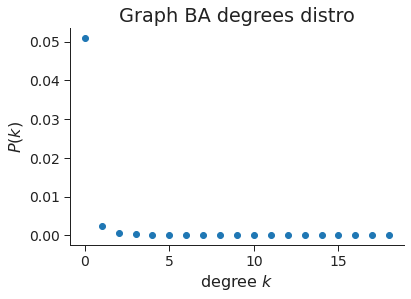

In [136]:
# Get 20 linear spaced bins between kmin and kmax
bin_edgesBA = np.linspace(kminBA, kmaxBA, num=20)

# histogram the data into these bins
density, _ = np.histogram(degreesBA, bins=bin_edgesBA, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
# log_be = np.log10(bin_edges1)
# x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title("Graph BA degrees distro")
plt.plot(density,marker='o', linestyle='none')
# plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

### Log Scale for BA

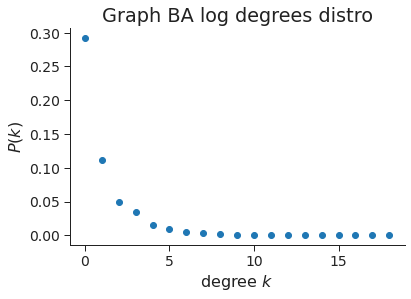

In [142]:
bin_edgesBA = np.logspace(np.log10(kminBA), np.log10(kmaxBA), num=20)

# histogram the data into these bins
density, _ = np.histogram(degreesBA, bins=bin_edgesBA, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edgesBA)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title("Graph BA log degrees distro")
plt.plot(density,marker='o', linestyle='none')
# plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the 

### Log Binning for BA

<ipython-input-145-53c4a7c0fde5>:12: RuntimeWarning: overflow encountered in power
  x = 2.7**((exp_be[1:] + exp_be[:-1])/2)


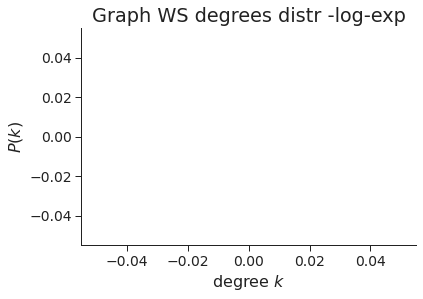

In [145]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edgesBA = np.logspace(np.log10(kminBA), np.log10(kmaxBA), num=10)

# histogram the data into these bins
density, _ = np.histogram(degreesBA, bins=bin_edgesBA, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN exp SPACE) of each bin
exp_be = np.exp(bin_edgesBA)
x = 2.7**((exp_be[1:] + exp_be[:-1])/2)

plt.title("Graph WS degrees distr -log-exp")
plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

### Linear Distr WS

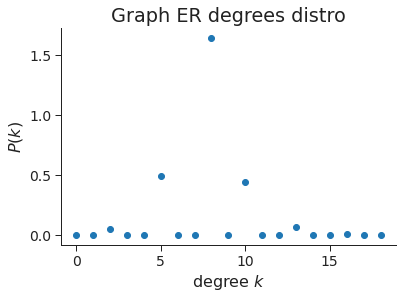

In [137]:
# Get 20 linear spaced bins between kmin and kmax
bin_edgesWS = np.linspace(kminWS, kmaxWS, num=20)

# histogram the data into these bins
density, _ = np.histogram(degreesWS, bins=bin_edgesWS, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
# log_be = np.log10(bin_edges1)
# x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title("Graph WS linear degrees distro")
plt.plot(density,marker='o', linestyle='none')
# plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

### Log scale for WS

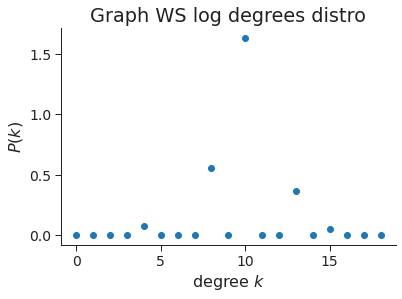

In [141]:
bin_edgesWS = np.logspace(np.log10(kminWS), np.log10(kmaxWS), num=20)

# histogram the data into these bins
density, _ = np.histogram(degreesWS, bins=bin_edgesWS, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN LOG SPACE) of each bin
log_be = np.log10(bin_edgesWS)
x = 10**((log_be[1:] + log_be[:-1])/2)

plt.title("Graph WS log degrees distro")
plt.plot(density,marker='o', linestyle='none')
# plt.loglog(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()

### Log binning for WS 

<ipython-input-144-ac6a139ea3bd>:12: RuntimeWarning: overflow encountered in power
  x = 2.7**((exp_be[1:] + exp_be[:-1])/2)


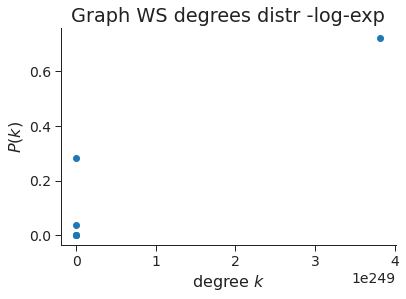

In [144]:
# Get 20 logarithmically spaced bins between kmin and kmax
bin_edgesWS = np.logspace(np.log10(kminWS), np.log10(kmaxWS), num=10)

# histogram the data into these bins
density, _ = np.histogram(degreesWS, bins=bin_edgesWS, density=True)


fig = plt.figure(figsize=(6,4))

# "x" should be midpoint (IN exp SPACE) of each bin
exp_be = np.exp(bin_edgesWS)
x = 2.7**((exp_be[1:] + exp_be[:-1])/2)

plt.title("Graph WS degrees distr -log-exp")
plt.plot(x, density, marker='o', linestyle='none')
plt.xlabel(r"degree $k$", fontsize=16)
plt.ylabel(r"$P(k)$", fontsize=16)

# remove right and top boundaries because they're ugly
ax = plt.gca()
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.yaxis.set_ticks_position('left')
ax.xaxis.set_ticks_position('bottom')

# Show the plot
plt.show()